<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/fmd99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 10037 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 31, 31, 128)       3584      
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 6, 6, 256)         1024      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 256)         0     

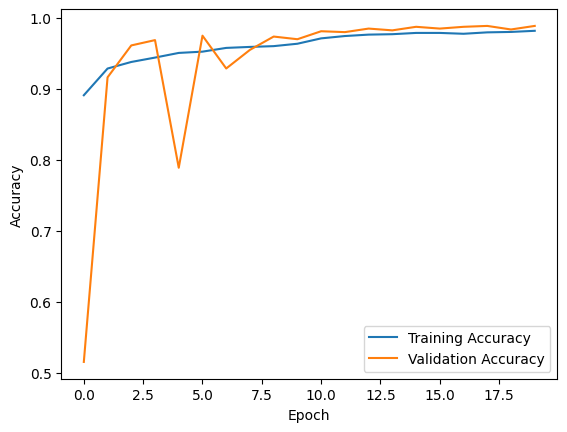

31/31 [==============================] - 4s 127ms/step - loss: 0.0348 - accuracy: 0.9899
Test Accuracy: 0.9899193644523621
diagram!!!!!!!!


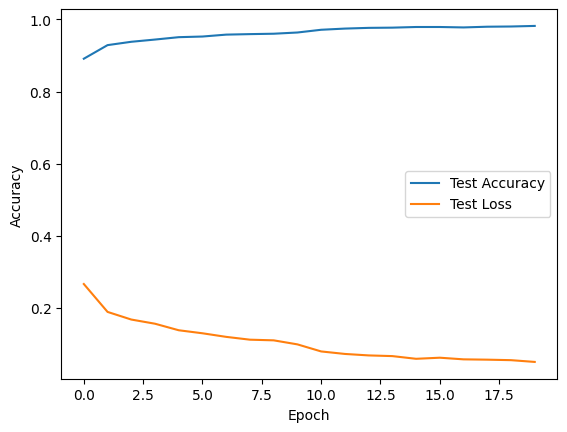

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping


# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Train',
    target_size=(64,64),
    batch_size=64,
    class_mode='binary')

validation_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Validation',
    target_size=(64,64),
    #batch_size=32,
    class_mode='binary')

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/mask detection/Face Mask Dataset/Test',
    target_size=(64,64),
    #batch_size=32,
    class_mode='binary')


# Learning Rate Scheduler
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

lr_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=3)

# CNN Model
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation='relu',strides=2))
model.add(Conv2D(256, (5,5), padding='same', activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(3,3),strides=3,padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(256, (3,3), input_shape=(64,64,3), activation='relu',strides=2))
model.add(Conv2D(512, (5,5), padding='same', activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(3,3),strides=3,padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_dataset,
    #steps_per_epoch=train_dataset.samples // 32,
    epochs=20,
    validation_data=validation_dataset,
    #validation_steps=validation_dataset.samples // 32,

    callbacks=[checkpoint, early_stopping,lr_scheduler]
    )

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")


print('diagram!!!!!!!!')
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save('model_99.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 5s 147ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       483
           1       0.00      0.00      0.00       509

    accuracy                           0.49       992
   macro avg       0.24      0.50      0.33       992
weighted avg       0.24      0.49      0.32       992

Normalized confusion matrix


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


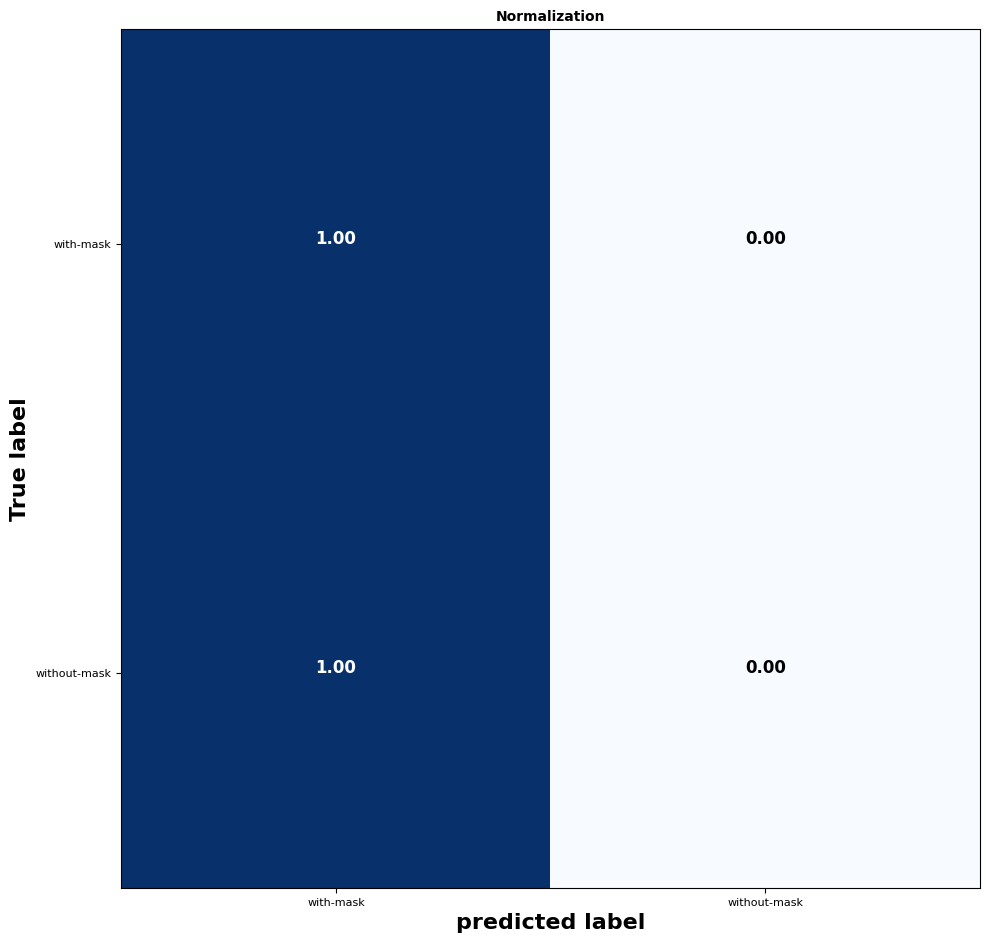

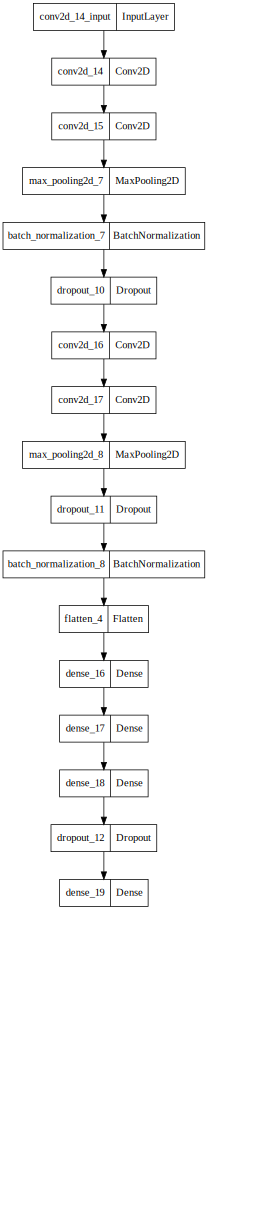

In [14]:
#confusion matrix
from sklearn.metrics import classification_report
import numpy as np
Y_pred=model.predict(test_dataset)
y_pred=np.argmax(Y_pred,axis=1)

print(classification_report(test_dataset.classes,y_pred))

import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix, without Normalization')

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title, weight='bold',fontsize=10)
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes, fontsize=8)
  plt.yticks(tick_marks,classes, fontsize=8)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text (j,i,format(cm[i,j],fmt),
              horizontalalignment='center',fontsize=12,weight='bold',
              color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('predicted label', fontsize=16, weight='bold')

#comput confusion matrix
cnf_matrix=confusion_matrix(test_dataset.classes,y_pred)
np.set_printoptions(precision=2)

#plot non_normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix,classes=['with-mask','without-mask'],normalize=True,title='Normalization')
plt.show()


from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [11]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

NameError: name 'cf' is not defined

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
